**This can be solved in 2 methods 1.)Hough tranform 2.)Template matching**
            If there are some other methods apart from Machine learning methods i would like to know...

In [30]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

count = 0
img = cv2.imread('/content/1-1-1.jpg', cv2.IMREAD_COLOR)
img = cv2.resize(img,(720,1000))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_blurred = cv2.blur(gray, (3, 3))

# Apply Hough transform 
detected_circles = cv2.HoughCircles(gray_blurred,
				cv2.HOUGH_GRADIENT, 1, 10, param1 = 50,
			param2 = 24, minRadius = 1, maxRadius = 20)


if detected_circles is not None:

	detected_circles = np.uint16(np.around(detected_circles))

	for pt in detected_circles[0, :]:
		a, b, r = pt[0], pt[1], pt[2]
		cv2.circle(img, (a, b), r, (0, 255, 0), 2)
		cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
		count+=1

print('There are {} pieces in the given box 1-1-1.jpg'.format(count))

There are 35 pieces in the given box 1-1-1.jpg


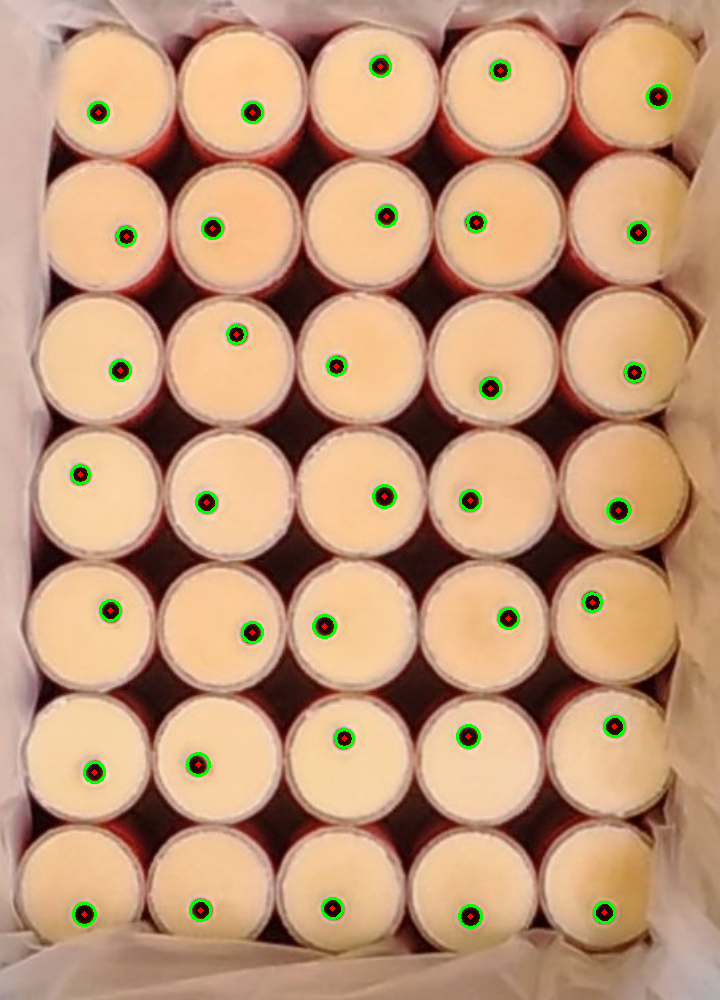

In [31]:
cv2_imshow(img)
#Here the distortion is because of the resizing that is done in the code snippet

In [32]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

count = 0
img = cv2.imread('/content/1-1-1-1.jpg', cv2.IMREAD_COLOR)
img = cv2.resize(img,(720,1000))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_blurred = cv2.blur(gray, (3, 3))

# Apply Hough transform 
detected_circles = cv2.HoughCircles(gray_blurred,
				cv2.HOUGH_GRADIENT, 1, 10, param1 = 50,
			param2 = 24, minRadius = 1, maxRadius = 20)


if detected_circles is not None:

	detected_circles = np.uint16(np.around(detected_circles))

	for pt in detected_circles[0, :]:
		a, b, r = pt[0], pt[1], pt[2]
		cv2.circle(img, (a, b), r, (0, 255, 0), 2)
		cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
		count+=1

print('There are {} pieces in the given box 1-1-1-1.jpg'.format(count))

There are 35 pieces in the given box 1-1-1-1.jpg


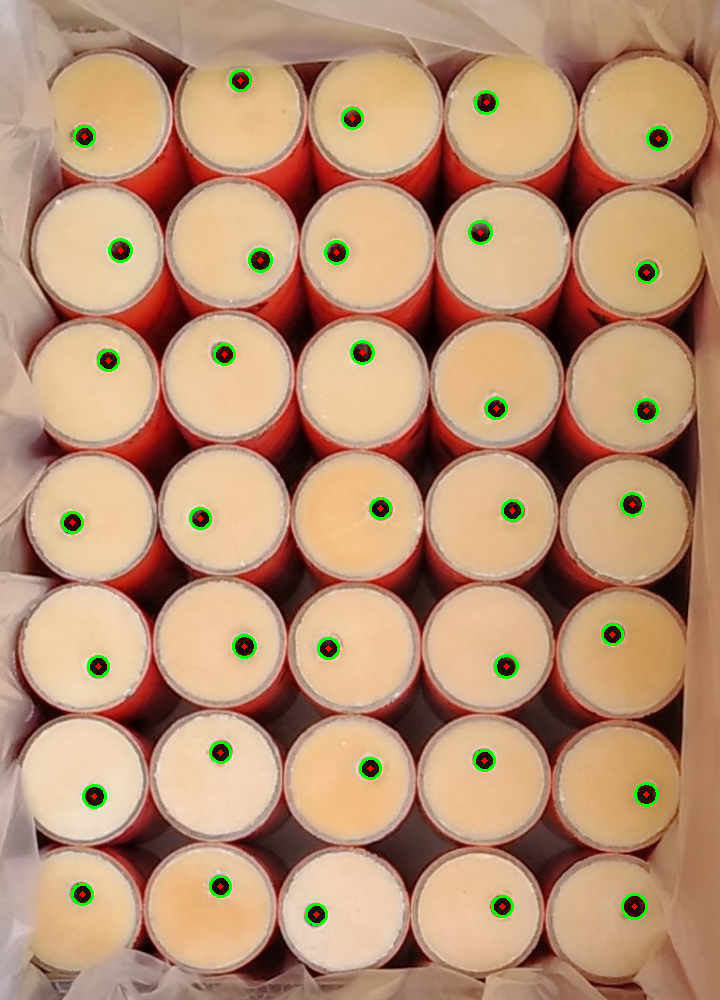

In [33]:
cv2_imshow(img)

In [65]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

count = 0
img = cv2.imread('/content/1-1.jpg', cv2.IMREAD_COLOR)
img = cv2.resize(img,(720,1000))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_blurred = cv2.blur(gray, (3, 3))

# Apply Hough transform 
detected_circles = cv2.HoughCircles(gray,
				cv2.HOUGH_GRADIENT, 1, 10, param1 = 55,
			param2 = 21, minRadius = 1, maxRadius = 15)


if detected_circles is not None:

	detected_circles = np.uint16(np.around(detected_circles))

	for pt in detected_circles[0, :]:
		a, b, r = pt[0], pt[1], pt[2]
		cv2.circle(img, (a, b), r, (0, 255, 0), 2)
		cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
		count+=1

print('There are {} pieces in the given box 1-1.jpg'.format(count))

There are 35 pieces in the given box 1-1.jpg


Here the result is not accurate look below after adding higher intensities


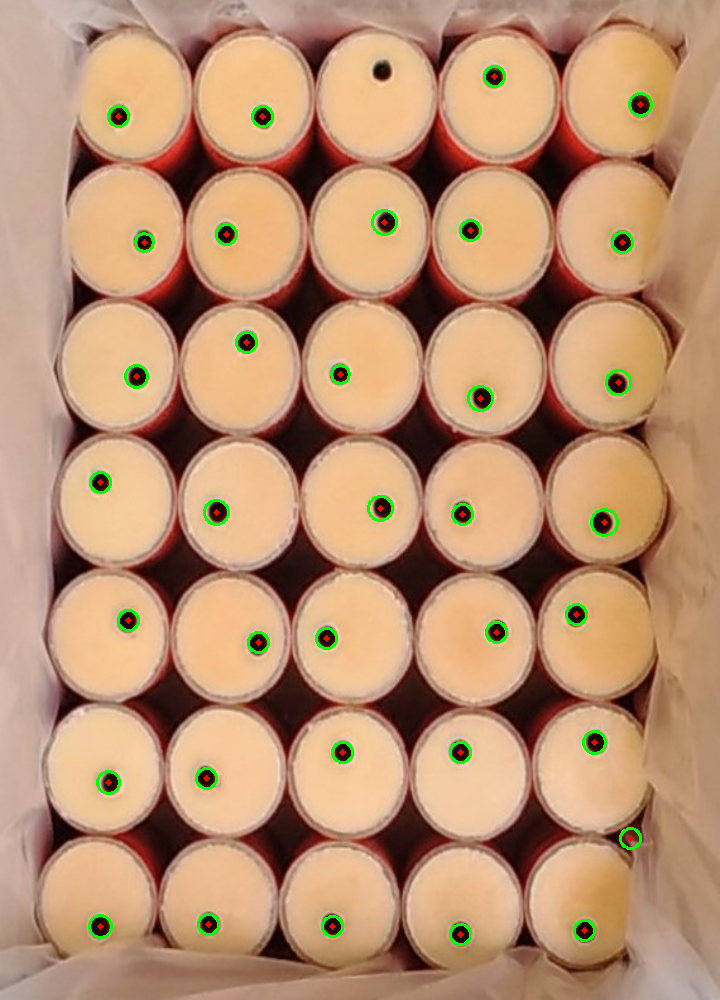

In [66]:
cv2_imshow(img)

In [73]:
img = cv2.imread('/content/1-1.jpg')

G = cv2.GaussianBlur(img,(3,3),0)

img = 0.9*img + 0.1 *(img - G)

count = 0

img = cv2.resize(img,(720,1000))
img = np.array(img, dtype=np.uint8)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_blurred = cv2.blur(gray, (3, 3))

# Apply Hough transform 
detected_circles = cv2.HoughCircles(gray_blurred,
				cv2.HOUGH_GRADIENT, 1, 10, param1 = 50,
			param2 = 24, minRadius = 1, maxRadius = 20)


if detected_circles is not None:

	detected_circles = np.uint16(np.around(detected_circles))

	for pt in detected_circles[0, :]:
		a, b, r = pt[0], pt[1], pt[2]
		cv2.circle(img, (a, b), r, (0, 255, 0), 2)
		cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
		count+=1

print('There are {} pieces in the given box 1-1.jpg'.format(count))

There are 35 pieces in the given box 1-1.jpg


And here the model is accurate

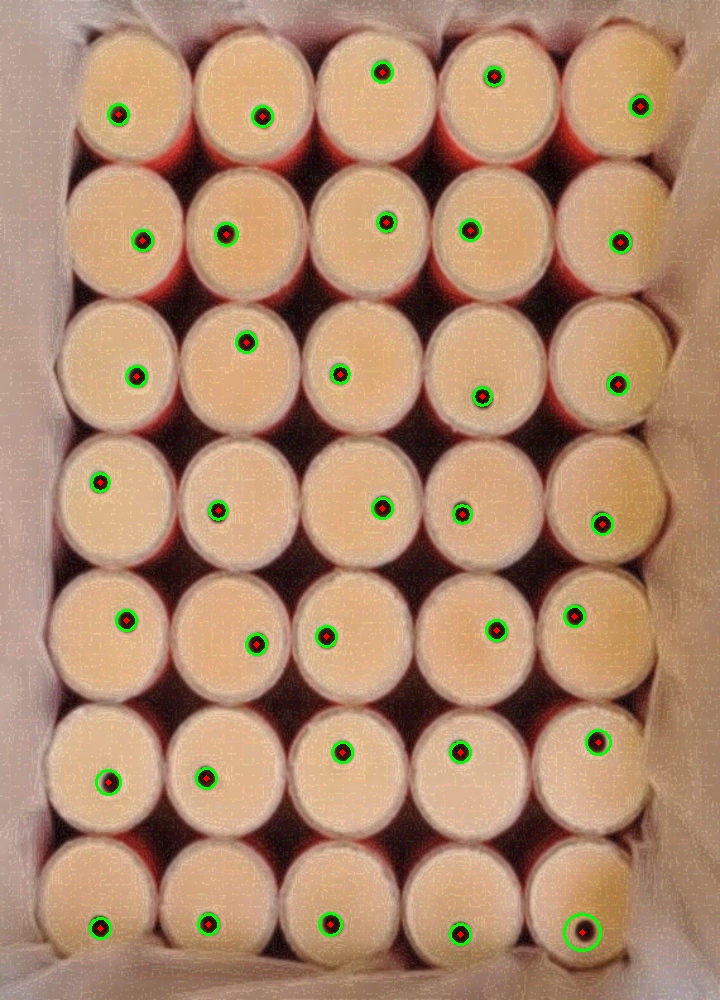

In [74]:
cv2_imshow(img)

Using Template matching only for one Image(1-1-1-1.jpg)


In [70]:
#Using Template matching but not accurate results should finetune it to get accurate results

image = cv2.imread('/content/1-1-1-1.jpg')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#Patch only for this specific image
patch_image = image[195:345,35:180]
patch_gray = cv2.cvtColor(patch_image, cv2.COLOR_BGR2GRAY)
w, h = patch_gray.shape[::-1]
res = cv2.matchTemplate(img_gray,patch_gray,cv2.TM_CCOEFF_NORMED)

threshold = 0.60
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_gray, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)

cv2.imwrite('res.png',img_gray)


True

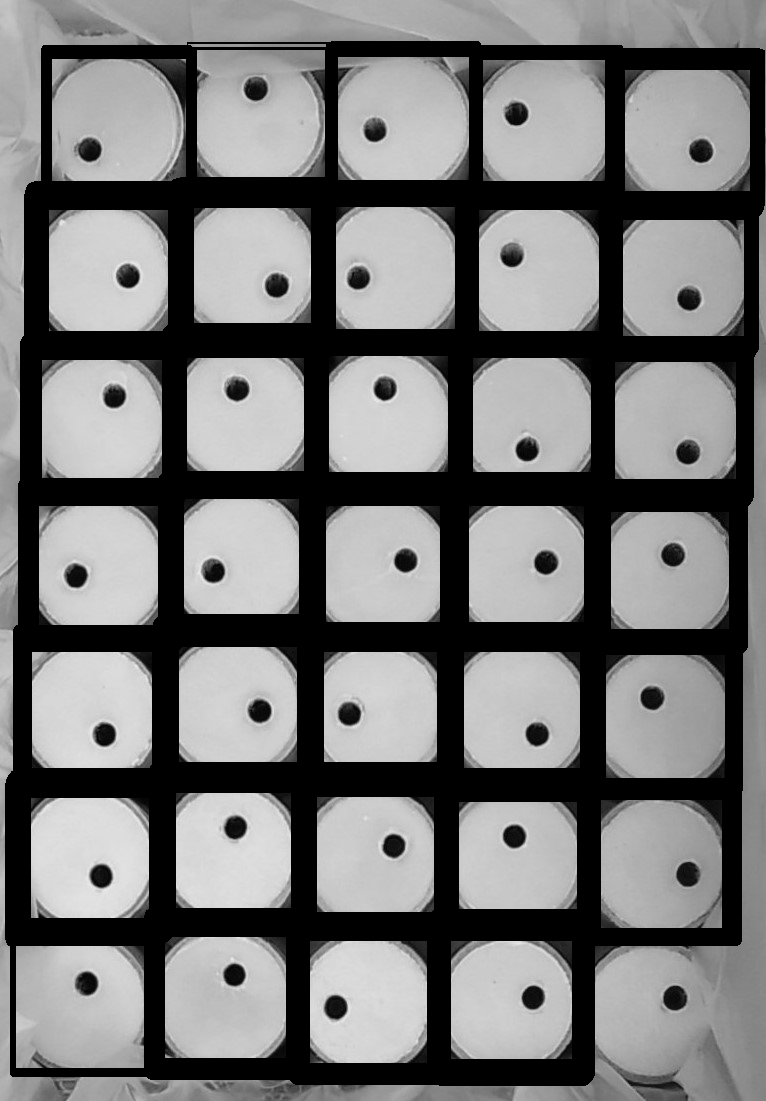

In [71]:
image = cv2.imread('res.png')
cv2_imshow(image)